1. Data Understanding 

Dataset Description:
The dataset contains information about 200 houses. Each row represents one house, and each column represents a specific feature related to the house. The dataset is used to analyze and predict house prices using multiple linear regression.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
data = pd.read_csv("House_data.csv")
data.head()


,House_ID,Size_sqm,Bedrooms,Price_USD
0,1,50,1,30000
1,2,51,1,30500
2,3,52,1,31000
3,4,53,1,31500
4,5,54,1,32000


In [25]:
print("shape (Rows, columns):", data.shape)

shape (Rows, columns): (200, 4)


In [26]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   House_ID   200 non-null    int64
 1   Size_sqm   200 non-null    int64
 2   Bedrooms   200 non-null    int64
 3   Price_USD  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [27]:
data.describe()


,House_ID,Size_sqm,Bedrooms,Price_USD
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,149.500000,5.500000,79750.000000
std,57.879185,57.879185,2.879489,28939.592257
min,1.000000,50.000000,1.000000,30000.000000
25%,50.750000,99.750000,3.000000,54875.000000
50%,100.500000,149.500000,5.500000,79750.000000
75%,150.250000,199.250000,8.000000,104625.000000
max,200.000000,249.000000,10.000000,129500.000000


2. DATA EXPLORATION

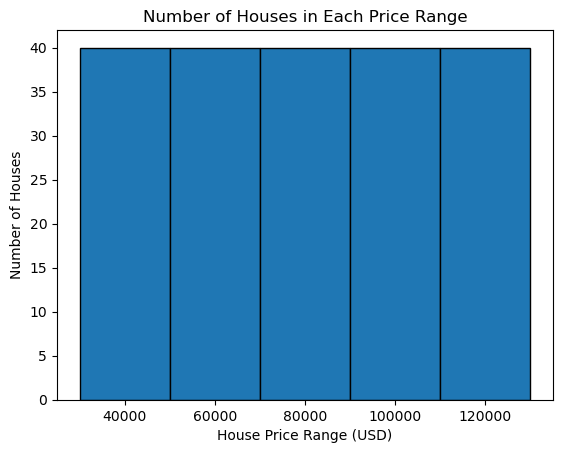

In [56]:
bins = [30000, 50000, 70000, 90000, 110000, 130000]

plt.hist(data["Price_USD"], bins=bins, edgecolor="black")
plt.xlabel("House Price Range (USD)")
plt.ylabel("Number of Houses")
plt.title("Number of Houses in Each Price Range")
plt.show()


Interpretation:

Each bar reaches about 40 houses

This means:

Around 40 houses fall into each price range

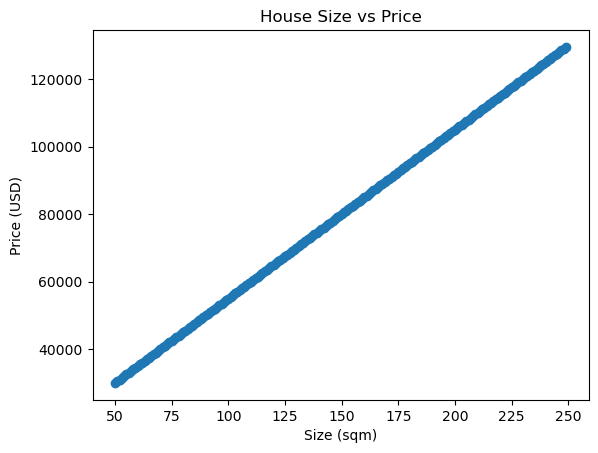

In [57]:
plt.scatter(data["Size_sqm"], data["Price_USD"])
plt.xlabel("Size (sqm)")
plt.ylabel("Price (USD)")
plt.title("House Size vs Price")
plt.show()


Interpretation:
The scatter plot shows a strong positive linear relationship between house size and price.

In [33]:
data.corr()


,House_ID,Size_sqm,Bedrooms,Price_USD
House_ID,1.000,1.000,0.995,1.000
Size_sqm,1.000,1.000,0.995,1.000
Bedrooms,0.995,0.995,1.000,0.995
Price_USD,1.000,1.000,0.995,1.000


Interpretation:
Correlation values indicate that house size and number of bedrooms are strongly related to house price

3. DATA PREPROCESSING

In [35]:
data.isnull().sum()


House_ID     0
Size_sqm     0
Bedrooms     0
Price_USD    0
dtype: int64

In [36]:
data.duplicated().sum()
 

np.int64(0)

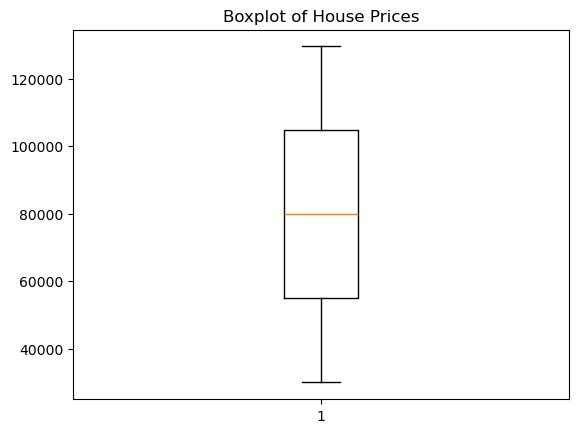

In [37]:
plt.boxplot(data["Price_USD"])
plt.title("Boxplot of House Prices")
plt.show()


Interpretation:

Median house price is around 80,000.
Most prices (50%) fall between 55,000 and 105,000.
Prices range from 30,000 to 130,000.

The boxplot shows no significant outliers; therefore, no data removal is necessary.

4. MODEL TRAINING

Define Features and Target Variable

In [40]:
X = data[["Size_sqm", "Bedrooms"]]
y = data["Price_USD"]


Interpretation:
Independent variables are house size and number of bedrooms, while the dependent variable is house price.

Split the Dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Interpretation:
The dataset is split into 80% training data and 20% testing data.

Train the Model

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Interpretation:
The multiple linear regression model is trained using the training dataset.

5. MODEL EVALUATION

Making Predictions

In [44]:
y_pred = model.predict(X_test)


Interpretation:
The model predicts house prices for the test dataset.

#Evaluate Model Performance

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1.6014216659026615e-22
R2 Score: 1.0


Interpretation:
Mean Squared Error measures prediction error, while R² score shows how well the model explains the variance.

Actual vs Predicted Visualization

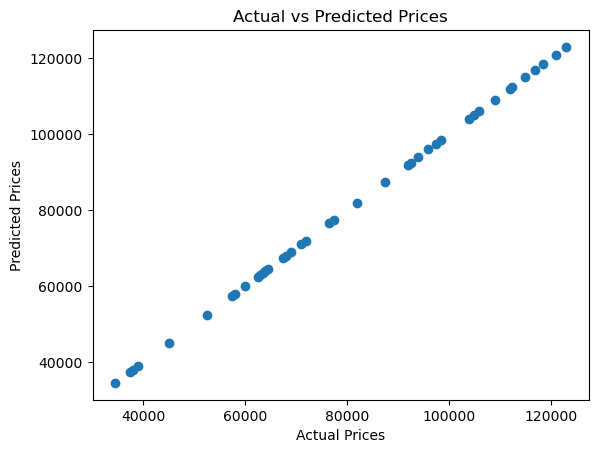

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


Interpretation:
The plot compares actual and predicted prices, showing good model performance.

6. CONCLUSION AND FUTURE WORK

Interpretation:
The multiple linear regression model successfully predicted house prices based on size and number of bedrooms. The dataset was clean and showed strong linear relationships, leading to good model performance.

#Future Work

Interpretation:
Future improvements may include adding more features such as location, house age, and neighborhood information, as well as using more advanced machine learning models.

END